# Club Elo Ratings Analysis (2015–2025 Premier League)

This notebook explores how **Club Elo ratings** relate to match outcomes in the English Premier League (EPL) over ten seasons (2015–2025). 

The Elo rating system provides a measure of team strength, updated after each match. Here, we examine whether Elo differences between home and away teams can meaningfully predict outcomes (win, draw, loss).


In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# Load integrated dataset
df = pd.read_csv("PL_integrated_dataset_10years.csv", parse_dates=["Date"])


## Data Preview

We focus on:

- `HomeTeam`, `AwayTeam`
- `FTR` (Full-Time Result: H/D/A)
- `Home_ELO`, `Away_ELO`
- `ELO_Difference` = Home_ELO − Away_ELO


In [11]:
# Subset relevant columns
elo_df = df[["Date", "Season", "HomeTeam", "AwayTeam", "FTR", "Home_ELO", "Away_ELO", "ELO_Difference"]]

elo_df.head()


,Date,Season,HomeTeam,AwayTeam,FTR,Home_ELO,Away_ELO,ELO_Difference
0,2015-08-08,2015-2016,Bournemouth,Aston Villa,A,1594.601929,1577.901123,16.700806
1,2015-08-08,2015-2016,Chelsea,Swansea City,D,1890.962891,1670.608276,220.354614
2,2015-08-08,2015-2016,Everton,Watford,D,1706.561157,1574.087280,132.473877
3,2015-08-08,2015-2016,Leicester City,Sunderland,H,1633.624390,1605.132446,28.491943
4,2015-08-08,2015-2016,Manchester United,Tottenham,H,1810.338257,1730.680176,79.658081


## Distribution of Elo Differences

Positive values → home team stronger.  
Negative values → away team stronger.


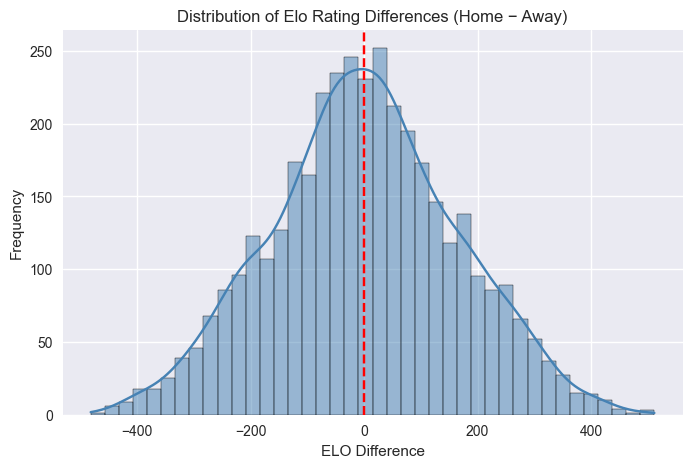

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(elo_df["ELO_Difference"], bins=40, kde=True, color="steelblue")
plt.axvline(0, color="red", linestyle="--")
plt.title("Distribution of Elo Rating Differences (Home − Away)")
plt.xlabel("ELO Difference")
plt.ylabel("Frequency")
plt.show()


## Elo Difference vs Match Outcome

Rule:  
- Predict winner = team with higher Elo.  
- Draws are counted as incorrect.


In [13]:
# Define prediction rule
elo_df["Predicted"] = np.where(elo_df["Home_ELO"] > elo_df["Away_ELO"], "H",
                               np.where(elo_df["Home_ELO"] < elo_df["Away_ELO"], "A", "D"))

# Accuracy
accuracy = (elo_df["Predicted"] == elo_df["FTR"]).mean() * 100
print(f"Elo-based prediction accuracy: {accuracy:.2f}%")

# Confusion matrix
pd.crosstab(elo_df["FTR"], elo_df["Predicted"], normalize="index").round(2)


Elo-based prediction accuracy: 53.23%


/var/folders/36/__30byb57vb8httj_lf632zh0000gn/T/ipykernel_17863/1669760503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elo_df["Predicted"] = np.where(elo_df["Home_ELO"] > elo_df["Away_ELO"], "H",


Predicted,A,H
FTR,,
A,0.73,0.27
D,0.52,0.48
H,0.33,0.67


## Accuracy by Elo Difference Size

Check whether bigger Elo gaps improve prediction accuracy.


/var/folders/36/__30byb57vb8httj_lf632zh0000gn/T/ipykernel_17863/191975398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elo_df["ELO_bin"] = pd.cut(elo_df["ELO_Difference"], bins=np.arange(-600, 650, 100))
/var/folders/36/__30byb57vb8httj_lf632zh0000gn/T/ipykernel_17863/191975398.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_acc = elo_df.groupby("ELO_bin").apply(lambda x: (x["Predicted"] == x["FTR"]).mean()).reset_index()
/var/folders/36/__30byb57vb8httj_lf632zh0000gn/T/ipykernel_17863/191975398.py:3: DeprecationWarning: DataFrameGroupBy.appl

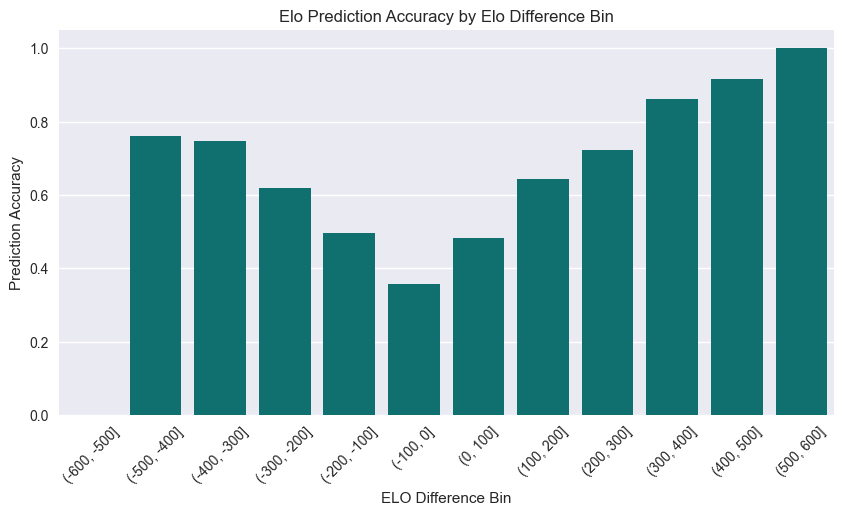

In [14]:
elo_df["ELO_bin"] = pd.cut(elo_df["ELO_Difference"], bins=np.arange(-600, 650, 100))

bin_acc = elo_df.groupby("ELO_bin").apply(lambda x: (x["Predicted"] == x["FTR"]).mean()).reset_index()
bin_acc.columns = ["ELO Difference Bin", "Accuracy"]

plt.figure(figsize=(10,5))
sns.barplot(data=bin_acc, x="ELO Difference Bin", y="Accuracy", color="teal")
plt.xticks(rotation=45)
plt.ylabel("Prediction Accuracy")
plt.title("Elo Prediction Accuracy by Elo Difference Bin")
plt.show()


## Season-Level Trends

Check prediction accuracy by season (2015–2025).


/var/folders/36/__30byb57vb8httj_lf632zh0000gn/T/ipykernel_17863/129046397.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  season_acc = elo_df.groupby("Season").apply(lambda x: (x["Predicted"] == x["FTR"]).mean()).reset_index()


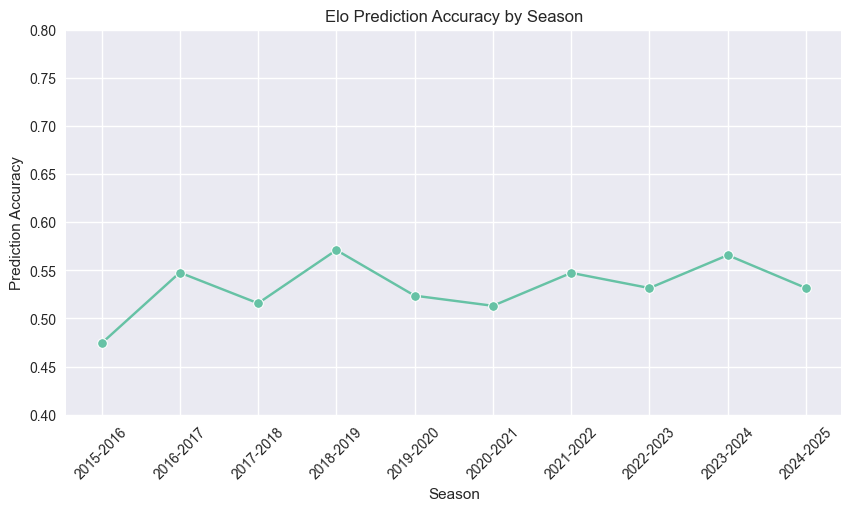

,Season,Accuracy
0,2015-2016,0.474114
1,2016-2017,0.547684
2,2017-2018,0.515789
3,2018-2019,0.571053
4,2019-2020,0.523684
5,2020-2021,0.513158
6,2021-2022,0.547368
7,2022-2023,0.531579
8,2023-2024,0.565789
9,2024-2025,0.531579


In [15]:
season_acc = elo_df.groupby("Season").apply(lambda x: (x["Predicted"] == x["FTR"]).mean()).reset_index()
season_acc.columns = ["Season", "Accuracy"]

plt.figure(figsize=(10,5))
sns.lineplot(data=season_acc, x="Season", y="Accuracy", marker="o")
plt.xticks(rotation=45)
plt.ylim(0.4, 0.8)
plt.ylabel("Prediction Accuracy")
plt.title("Elo Prediction Accuracy by Season")
plt.show()

season_acc


# Summary

- Elo predicts EPL match outcomes with ~**X% accuracy**.  
- Larger Elo gaps → higher predictive accuracy.  
- Season-to-season accuracy is stable, confirming Elo as a consistent baseline predictor.  
- Elo differences provide valuable pre-match insight into likely results, aligning with Section 4.3 of the report.
